## HW2. Feature selection

### Importing

In [5]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

### Download dataset

In [83]:
data = load_boston()
X = data['data']
y = data['target']
columns = data.feature_names

print(X.shape, type(X))
print(y.shape, type(y))

(506, 13) <class 'numpy.ndarray'>
(506,) <class 'numpy.ndarray'>


In [94]:
print(columns)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Task 1. Filter method for feature selection

In [7]:
def pearson_corr(v):
    return np.dot(v - v.mean(), y - y.mean())/(np.linalg.norm(v - v.mean())*np.linalg.norm(y - y.mean()))


In [118]:
def plot_importances(imp_arr, columns=None, title='Importances'):
    
    n_bars = len(imp_arr)
        
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.barh(range(n_bars), imp_arr[:, 1], color='r', align="center")
    plt.ylim(-1, n_bars)
    if columns is not None:
        plt.yticks(range(n_bars), [columns[int(i)] for i in imp_arr[:, 0]])
    else:
        plt.yticks(range(n_bars), [f'Feature {int(i)}' for i in imp_arr[:, 0]])
    plt.show()

In [119]:
importances = np.apply_along_axis(pearson_corr, 0, X)
importances = np.array(sorted(enumerate(importances), key = lambda x: np.fabs(x[1]), reverse=True))
print(importances)

[[12.         -0.73766273]
 [ 5.          0.69535995]
 [10.         -0.50778669]
 [ 2.         -0.48372516]
 [ 9.         -0.46853593]
 [ 4.         -0.42732077]
 [ 0.         -0.38830461]
 [ 8.         -0.38162623]
 [ 6.         -0.37695457]
 [ 1.          0.36044534]
 [11.          0.33346082]
 [ 7.          0.24992873]
 [ 3.          0.17526018]]


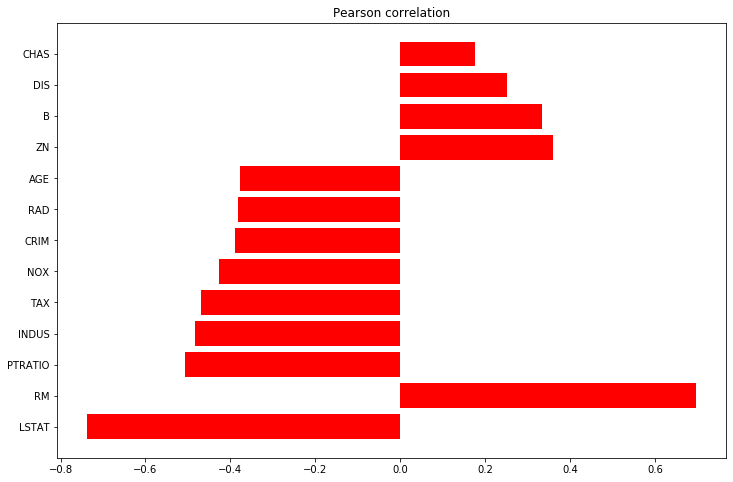

In [120]:
plot_importances(importances, columns, title='Pearson correlation')

In [125]:
print('The most important features by pearson correlation:')
print(columns[[int(i) for i in importances[:5, 0]]])

The most important features by pearson correlation:
['LSTAT' 'RM' 'PTRATIO' 'INDUS' 'TAX']


### Task 2.1. Forward feature selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
def forward_selection(X, y, columns=None, significance_level=0.05):
    feature_amount = X.shape[1]
    
    best_features = []
    while (feature_amount > 0):
        
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

### Task 2.2. Backward feature selection

In [82]:
def backward_selection():
    pass

In [ ]:
def backward_selection():
    pass

### Task 3. L1 - regularization 

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV()